In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
print(df.isnull().sum())
df.head()


Thousands of Passengers    0
dtype: int64


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index.freq = 'MS'
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
train_data = df[:109]
test_data = df[108:]
print(train_data['Thousands of Passengers'])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
1958-01-01    340
Freq: MS, Name: Thousands of Passengers, Length: 109, dtype: int64


In [8]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [9]:
test_predictions = fitted_model.forecast(36)
test_predictions.head()

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
Freq: MS, dtype: float64

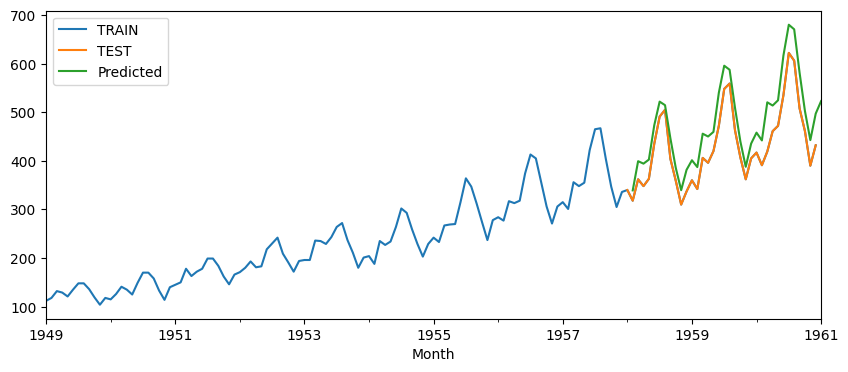

In [10]:
df['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(10,4));
test_data['Thousands of Passengers'].plot(legend=True, label='TEST');
test_predictions.plot(legend=True, label='Predicted');

### Calculate the MAE, MSE, RMSE
* try to compare the MAE error with the mean to get an idea how far you are from the mean 
* compare the RMSE to the standard deviation

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [13]:
mean_absolute_error(test_data, test_predictions)

63.03104082299123

In [14]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92820898138402

### train the model on the whole data

In [15]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [21]:
%time final_model.forecast(36)
forecast_predictions = final_model.forecast(36)

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 10.7 ms


<Axes: xlabel='Month'>

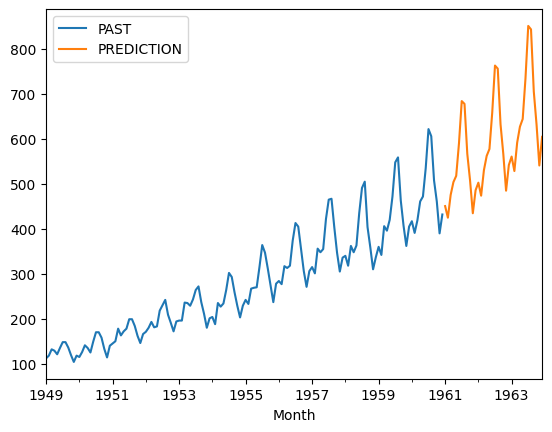

In [17]:
df['Thousands of Passengers'].plot(legend=True, label='PAST')
forecast_predictions.plot(legend=True, label='PREDICTION')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

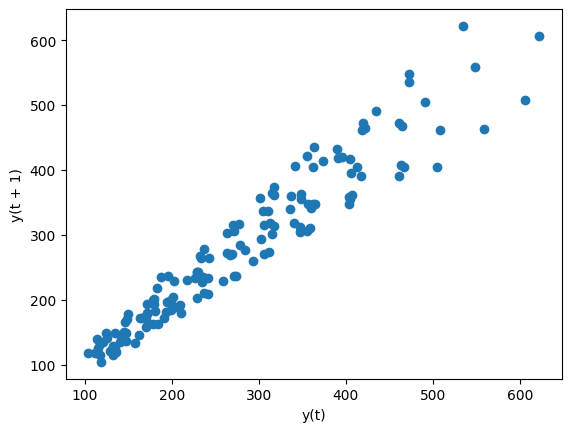

In [23]:
from pandas.plotting import lag_plot
lag_plot(df['Thousands of Passengers'], lag=1)